In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Machine Learning Explainability/hospital-readmissions/train.csv')

y = data.readmitted

base_features = [c for c in data.columns if c != "readmitted"]

X = data[base_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

In [5]:
pip install eli5

In [2]:
# Use permutation importance as a succinct model summary
# A measure of model performance on validation data would be useful here too

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0451 ± 0.0068,number_inpatient
0.0087 ± 0.0046,number_emergency
0.0062 ± 0.0053,number_outpatient
0.0033 ± 0.0016,payer_code_MC
0.0020 ± 0.0016,diag_3_401
0.0016 ± 0.0031,medical_specialty_Emergency/Trauma
0.0014 ± 0.0024,A1Cresult_None
0.0014 ± 0.0021,medical_specialty_Family/GeneralPractice
0.0013 ± 0.0010,diag_2_427
0.0013 ± 0.0011,diag_2_276


In [6]:
pip install pdpbox

Processing c:\users\vikar\appdata\local\pip\cache\wheels\35\fb\ef\a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb\pdpbox-0.2.1-py3-none-any.whlNote: you may need to restart the kernel to use updated packages.
Processing c:\users\vikar\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897\sklearn-0.0-py2.py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\vikar\anaconda3\lib\site-packages\__pycache__\pylab.cpython-38.pyc
   from C:\Users\vikar\AppData\Local\Temp\pip-uninstall-eyo8mkq5\pylab.cpython-38.pyc
  Moving to c:

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\vikar\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\vikar\\AppData\\Local\\Temp\\pip-install-s4064pf2\\matplotlib\\setup.py'"'"'; __file__='"'"'C:\\Users\\vikar\\AppData\\Local\\Temp\\pip-install-s4064pf2\\matplotlib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\vikar\AppData\Local\Temp\pip-wheel-us9jailk'
       cwd: C:\Users\vikar\AppData\Local\Temp\pip-install-s4064pf2\matplotlib\
  Complete output (499 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        python: yes [3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
  
  OPTIONAL SUBPACKAGES
   sample_data: yes [installing]
         tests:

  copying lib\matplotlib\mpl-data\fonts\ttf\STIXGeneralItalic.ttf -> build\lib.win-amd64-3.8\matplotlib\mpl-data\fonts\ttf
  copying lib\matplotlib\mpl-data\images\move.pdf -> build\lib.win-amd64-3.8\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\stylelib\seaborn-notebook.mplstyle -> build\lib.win-amd64-3.8\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\fonts\pdfcorefonts\Times-Roman.afm -> build\lib.win-amd64-3.8\matplotlib\mpl-data\fonts\pdfcorefonts
  copying lib\matplotlib\mpl-data\images\zoom_to_rect.gif -> build\lib.win-amd64-3.8\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\fonts\afm\pagdo8a.afm -> build\lib.win-amd64-3.8\matplotlib\mpl-data\fonts\afm
  creating build\lib.win-amd64-3.8\matplotlib\backends\web_backend\jquery
  creating build\lib.win-amd64-3.8\matplotlib\backends\web_backend\jquery\js
  copying lib\matplotlib\backends\web_backend\jquery\js\jquery.min.js -> build\lib.win-amd64-3.8\matplotlib\backends\web_backend\jquery\j

    copying lib\matplotlib\backends\windowing.py -> build\lib.win-amd64-3.8\matplotlib\backends
    copying lib\matplotlib\backends\wx_compat.py -> build\lib.win-amd64-3.8\matplotlib\backends
    copying lib\matplotlib\backends\_backend_pdf_ps.py -> build\lib.win-amd64-3.8\matplotlib\backends
    copying lib\matplotlib\backends\_backend_tk.py -> build\lib.win-amd64-3.8\matplotlib\backends
    copying lib\matplotlib\backends\__init__.py -> build\lib.win-amd64-3.8\matplotlib\backends
    creating build\lib.win-amd64-3.8\matplotlib\cbook
    copying lib\matplotlib\cbook\deprecation.py -> build\lib.win-amd64-3.8\matplotlib\cbook
    copying lib\matplotlib\cbook\__init__.py -> build\lib.win-amd64-3.8\matplotlib\cbook
    creating build\lib.win-amd64-3.8\matplotlib\compat
    copying lib\matplotlib\compat\subprocess.py -> build\lib.win-amd64-3.8\matplotlib\compat
    copying lib\matplotlib\compat\__init__.py -> build\lib.win-amd64-3.8\matplotlib\compat
    creating build\lib.win-amd64-3.8\ma

In [7]:
# PDP for number_inpatient feature

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_name = 'number_inpatient'
# Create the data that we will plot
my_pdp = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=val_X.columns, feature=feature_name)

# plot it
pdp.pdp_plot(my_pdp, feature_name)
plt.show()

ModuleNotFoundError: No module named 'pdpbox'

In [8]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_name = 'time_in_hospital'
# Create the data that we will plot
my_pdp = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=val_X.columns, feature=feature_name)

# plot it
pdp.pdp_plot(my_pdp, feature_name)
plt.show()

ModuleNotFoundError: No module named 'pdpbox'

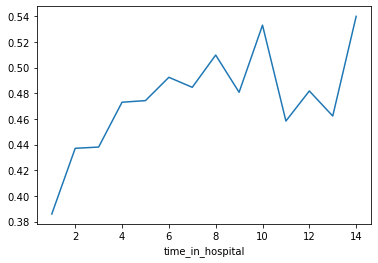

In [9]:
# A simple pandas groupby showing the average readmission rate for each time_in_hospital.

# Do concat to keep validation data separate, rather than using all original data
all_train = pd.concat([train_X, train_y], axis=1)

all_train.groupby(['time_in_hospital']).mean().readmitted.plot()
plt.show()

In [11]:
pip install shap

In [12]:
# Use SHAP values to show the effect of each feature of a given patient

import shap  # package used to calculate Shap values

sample_data_for_prediction = val_X.iloc[0].astype(float)  # to test function

def patient_risk_factors(model, patient_data):
    # Create object that can calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient_data)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient_data)